In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,4)

import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Part A: Data Cleaning

##### Import full data set using Pandas

In [2]:
bottle_df = pd.read_csv("bottle.csv", dtype='unicode', low_memory=False)
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50000,33.44000,NaN,25.64900,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46000,33.44000,NaN,25.65600,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46000,33.43700,NaN,25.65400,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45000,33.42000,NaN,25.64300,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45000,33.42100,NaN,25.64300,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bottle_df.shape

(864863, 74)

##### 1. We will increase the complexity of our model slightly by increasing the number of features. Keep the following features:

- T_degC (water temperature)
- Salnty (salinity of water)
- STheta (density of water)
- O2ml_L (milliliters of dissolved oxygen per liter of water)
- Depthm (depth in meters)

In [4]:
bottle_df = bottle_df[['T_degC', 'Salnty', 'STheta', 'O2ml_L', 'Depthm']]
bottle_df.shape

(864863, 5)

##### 2. Remove NaN / NA values from dataset (prior to building train/test sets) (same as HW #1):
Shape of your data should be: (661268, 5)

In [5]:
bottle_df = bottle_df.dropna()
bottle_df = bottle_df.astype(float)
bottle_df.shape

(661268, 5)

In [6]:
bottle_df.describe()

,T_degC,Salnty,STheta,O2ml_L,Depthm
count,661268.000000,661268.000000,661268.000000,661268.000000,661268.00000
mean,10.917560,33.832800,25.797882,3.416076,219.73400
std,4.224529,0.460338,1.009609,2.068615,311.15039
min,1.440000,29.402000,20.996000,-0.010000,0.00000
25%,7.800000,33.480000,24.941000,1.400000,49.00000
50%,10.160000,33.854000,25.972000,3.470000,125.00000
75%,14.010000,34.184800,26.634000,5.510000,300.00000
max,31.140000,37.034000,28.083000,11.130000,5351.00000


##### 3) Remove any STheta outliers (same as HW #1). 
- Shape of your data should be: (661268, 5)
- Note: Outliers for STheta might have been removed due to NAs in new features. Be sure to verify this on your own.

Scatter: STheta (density of water) vs T_degC

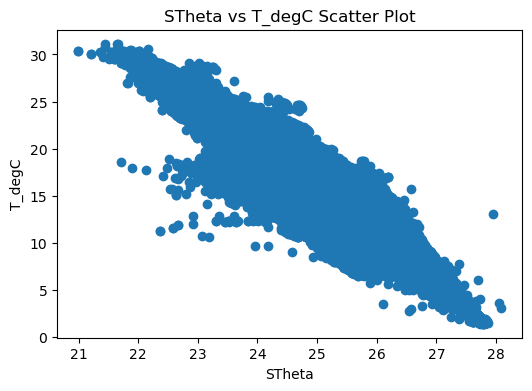

In [7]:
# Create a scatter plot
plt.scatter(bottle_df['STheta'], bottle_df['T_degC'])

# Add axis labels and a title
plt.xlabel("STheta")
plt.ylabel("T_degC")
plt.title("STheta vs T_degC Scatter Plot")

# Display the plot
plt.show()

In [8]:
bottle_df.shape

(661268, 5)

The scatter plot shows the relationship between two variables STheta and T_degC. We can clearly see that there are no outliers in STheta and hence we are good to proceed.


### Part B: Train / Test Split & Scaling

##### 1. Create X & y objects:

- X object should be all 4 predictors. Shape should be: (661268, 4)

- y object should be just your target variable (T_degC): Shape should be: (661268, 1)

In [9]:
#splitting into X,y
X = bottle_df.drop('T_degC', axis=1)
y = bottle_df['T_degC'].to_numpy()
y = y.reshape(-1, 1)

In [10]:
X.shape

(661268, 4)

In [11]:
y.shape

(661268, 1)

##### 2. Generate X_train, X_test, y_train & y_test. Use 80% for train & 20% for test.

In [12]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### 3. Scale all features to improve convergence in Gradient Descent. It is highly encouraged that you review the appropriate method of handling scaling with train & test data.

In [13]:
from sklearn.preprocessing import StandardScaler

# creating a StandardScaler object
scaler = StandardScaler()

# fitting the scaler to the training data and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# transforming the test data using the scaling parameters learned from the training data
X_test_scaled = scaler.transform(X_test)


In [14]:
# Alternative
# Normalize the input features
## X_train_scaled = (X_train - X_train.mean()) / X_train.std()
## X_test_scaled = (X_test - X_test.mean()) / X_test.std()

We fit the scaler to the training data only, and then use the same scaler to transform both the training and test data. This ensures that the scaling parameters learned from the training data are applied consistently to the test data, and helps prevent overfitting to the training data.

### Part C: Linear Regression with sklearn



##### 1. Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train_scaled & y_train.

In [15]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
lin_reg = LinearRegression()

# Fit lin_reg using X_train and y_train
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

##### 2. Print out the coefficients (including the intercept)

In [16]:
# Print out the coefficients
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

Intercept: [10.91541795]
Coefficients: [[ 1.63046569 -4.6345913   0.3020677  -0.47495536]]


##### 3. Predict T_degC for the test data using lin_reg. Make sure to use X_test_scaled!

Call predictions y_pred_sklearn

In [17]:
# Predict T_degC for the test data using the fitted values in lin_reg
y_pred_sklearn = lin_reg.predict(X_test_scaled)

##### 4. Calculate the following for the test data:

- mean squared error
- r-squared 
- explained variance

In [18]:
# Calculate mean squared error, r-squared, and explained variance for the test data
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)
evs_sklearn = explained_variance_score(y_test, y_pred_sklearn)

# Print the evaluation metrics
print("Mean squared error:", mse_sklearn)
print("R-squared:", r2_sklearn)
print("Explained variance:", evs_sklearn)

Mean squared error: 0.11101117205433632
R-squared: 0.9937682503632342
Explained variance: 0.9937684088237414


##### 5. Create a scatterplot that shows actual versus predicted values for the T_degC.

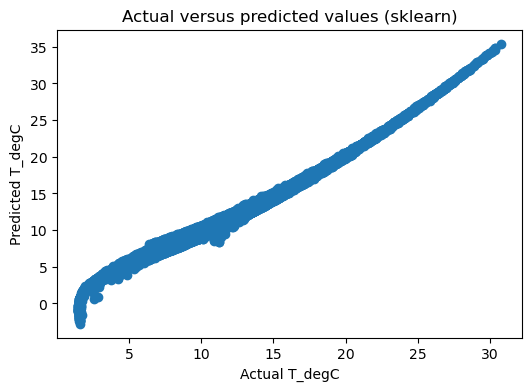

In [19]:
# Create a scatterplot of actual versus predicted values
plt.scatter(y_test, y_pred_sklearn)
plt.xlabel("Actual T_degC")
plt.ylabel("Predicted T_degC")
plt.title("Actual versus predicted values (sklearn)")
plt.show()

### Part D: Gradient Descent Mini-Batch


Mini-batch size: 50
Evaluation metrics for Test :
Mean squared error: 0.11849098415820998
R-squared: 0.993348361846621
Explained variance: 0.9934025353594004


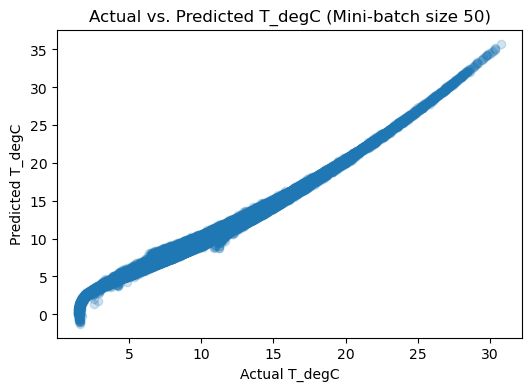

Evaluation metrics for Train :
Mean squared error: 0.11816655068263589
R-squared: 0.9933818028460155
Explained variance: 0.9934424032236259
******************************************************************

Mini-batch size: 250
Evaluation metrics for Test :
Mean squared error: 0.11258212760466281
R-squared: 0.993680062827701
Explained variance: 0.9936901617520404


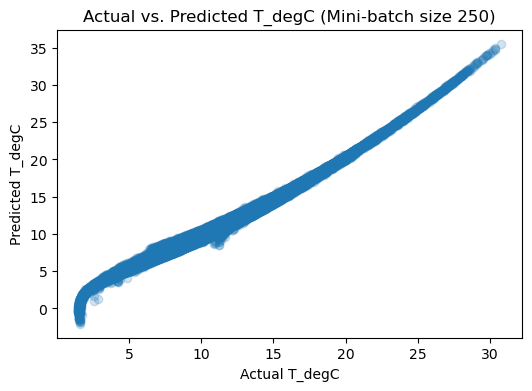

Evaluation metrics for Train :
Mean squared error: 0.11223316404030886
R-squared: 0.993714116198338
Explained variance: 0.9937269978268318
******************************************************************

Mini-batch size: 2000
Evaluation metrics for Test :
Mean squared error: 0.11108234889743424
R-squared: 0.9937642547629905
Explained variance: 0.9937642566494848


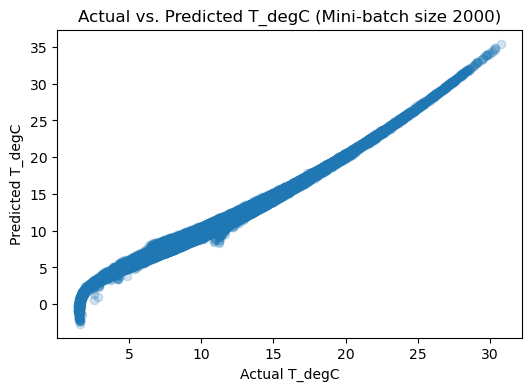

Evaluation metrics for Train :
Mean squared error: 0.1107041812493561
R-squared: 0.9937997504958369
Explained variance: 0.9937999455871723
******************************************************************



In [20]:
from sklearn.preprocessing import add_dummy_feature

# Step 1: Adding a column of 1s to X_train_scaled and X_test_scaled 
X_train_scaled_mb = add_dummy_feature(X_train_scaled)  
X_test_scaled_mb = add_dummy_feature(X_test_scaled) 

# Step 2: Setting the learning rate and epochs
eta = 0.1
epochs = 100

# Step 3: Performing gradient descent with mini-batch sizes of 50, 250, and 2000 and MSE cost function
batch_sizes = [50, 250, 2000]

for batch_size in batch_sizes:
    print(f"Mini-batch size: {batch_size}")
    n_batches = int(np.ceil(X_train_scaled_mb.shape[0] / batch_size))
    np.random.seed(42)
    theta = np.random.randn(X_train_scaled_mb.shape[1],1)

    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(X_train_scaled_mb.shape[0])
        X_shuffled = X_train_scaled_mb[shuffled_indices]
        y_shuffled = y_train[shuffled_indices]
        for i in range(n_batches):
            start_idx = i * batch_size
            end_idx = start_idx + batch_size
            X_batch = np.array(X_shuffled[start_idx:end_idx])
            y_batch = np.array(y_shuffled[start_idx:end_idx])
            
            y_pred = np.dot(X_batch, theta)
            error = y_pred - y_batch
            gradient = (2 * np.dot(X_batch.T, error)) / batch_size
            #gradient = 2 / batch_size * X_batch.T @ (X_batch @ theta - y_batch)
            theta = theta - eta * gradient
            
    # Step 4: Calculate error metrics for test data
    y_pred_test = np.dot(X_test_scaled_mb, theta)

    sk_mse = mean_squared_error(y_test, y_pred_test)
    sk_r_squared = r2_score(y_test, y_pred_test)
    sk_explained_variance = explained_variance_score(y_test, y_pred_test)

    # Print the evaluation metrics
    print("Evaluation metrics for Test :")
    print("Mean squared error:", sk_mse)
    print("R-squared:", sk_r_squared)
    print("Explained variance:", sk_explained_variance)
    
    # Step 5: Create scatterplot of actual versus predicted values for test data
    plt.scatter(y_test, y_pred_test, alpha=0.2)
    plt.xlabel("Actual T_degC")
    plt.ylabel("Predicted T_degC")
    plt.title(f"Actual vs. Predicted T_degC (Mini-batch size {batch_size})")
    plt.show()

    # Step 6: Calculate error metrics for training data
    y_pred_train = np.dot(X_train_scaled_mb, theta)
    
    sk_mse_train = mean_squared_error(y_train, y_pred_train)
    sk_r_squared_train = r2_score(y_train, y_pred_train)
    sk_explained_variance_train = explained_variance_score(y_train, y_pred_train)
    
    # Print the evaluation metrics
    print("Evaluation metrics for Train :")
    print("Mean squared error:", sk_mse_train)
    print("R-squared:", sk_r_squared_train)
    print("Explained variance:", sk_explained_variance_train)
    print("******************************************************************\n")


### Part E: Conceptual Questions


<i>1. Describe how parameter estimation in Gradient Descent differs from using the normal equation.</i>

Gradient Descent and the normal equation are two different approaches to <b>parameter estimation in linear regression</b>. 

<b>Gradient Descent</b> is an <b>iterative optimization algorithm</b> that updates the parameter values in small steps to minimize the cost function. It starts with an initial guess for the parameter values and updates them in the direction of the steepest descent of the cost function (direction of the negative gradient) until it converges to the optimal solution. Whereas <b>the normal equation</b> is a <b>closed-form solution</b> that directly computes the optimal parameter values by solving a system of linear equations.

<br>

<i>2. We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?</i>

Differences between <b>Mini-Batch Gradient Descent and Stochastic Gradient Descent:</b>

* <b>Number of examples:</b> In SGD, the algorithm updates the parameters for each example in the dataset, whereas in MBGD, the algorithm updates the parameters for a small batch of examples at each iteration.

* <b>Noise:</b> SGD is known for its noisy gradients, which can cause oscillations in the cost function. MBGD reduces this noise by averaging the gradients over a small batch of examples.

* <b>Convergence:</b> SGD can converge faster than MBGD because it takes smaller steps in the direction of the negative gradient. However, MBGD can be more stable and robust to noise because it takes an average of the gradients over a small batch of examples.

* <b>Computational efficiency:</b> SGD is computationally efficient because it only requires one example to update the model parameters. MBGD is less efficient than SGD but is still more efficient than Batch Gradient Descent, which updates the model parameters using the entire training dataset.

The choice between the two algorithms depends on the problem being solved, the size of the dataset, and the computational resources available.

<br>

<i>3. Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain.</i>

Based on the evaluation metrics, the best-performing version of our mini-batch Gradient Descent is the one with a <b>mini-batch size of 2000.</b> This version has the lowest mean squared error for both test and training data and the highest R-squared and explained variance scores for both test and training data.

When comparing the error metrics for the test and training data, we can see that there is no significant difference between the two sets, indicating that this version of Gradient Descent does not show signs of overfitting. Both sets have similar mean squared error, R-squared, and explained variance scores. This suggests that the model is generalizing well to new data, as the test set represents new, unseen data.

In summary, the best-performing version of mini-batch Gradient Descent has a mini-batch size of 2000 and shows no signs of overfitting, as the error metrics for the test and training data are similar.

<br>

<i>4. Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?</i>

The <b>learning rate</b> is a hyperparameter that determines the size of the steps taken by the optimization algorithm when updating the parameters of a machine learning model. It controls the magnitude of the update to the parameters in each iteration, and therefore, it is an important hyperparameter to tune when training a model.

Changing the learning rate over time, known as <b>learning rate scheduling</b>, can be helpful in certain cases to improve the performance of the optimization algorithm, such as reducing the risk of overshooting or slow convergence, and speeding up convergence by fine-tuning the model parameters.

For example, a learning rate that is too high at the beginning of training can cause the optimization algorithm to oscillate around the minimum of the cost function and fail to converge. In such cases, it may be beneficial to reduce the learning rate gradually over time to help the optimization algorithm settle down and converge to the minimum. Similarly, learning rate scheduling can also be used to speed up convergence by starting with a high learning rate and gradually reducing it over time as the optimization algorithm gets closer to the minimum of the cost function.

<br>

<i>5. Why would a data scientist want to use early stopping in gradient descent?</i>

<b>Early stopping</b> is a technique used in machine learning to prevent overfitting and improve the generalization performance of a model. In the context of gradient descent, early stopping involves monitoring the performance of the model on a validation set during training and stopping the training process when the validation performance stops improving.

Here are some reasons why a data scientist might want to use early stopping in gradient descent:

* <b>Prevent overfitting:</b> Overfitting occurs when a model learns to fit the training data too closely and does not generalize well to new, unseen data. By monitoring the performance of the model on a validation set during training and stopping the training process when the validation performance stops improving, early stopping can prevent overfitting and improve the generalization performance of the model.

* <b>Save time and computational resources:</b> Training a machine learning model can be computationally expensive, especially when dealing with large datasets or complex models. Early stopping can save time and computational resources by stopping the training process when further training is unlikely to improve the performance of the model.

* <b>Improve model interpretability:</b> Early stopping can also help improve the interpretability of a model by preventing it from learning complex, unnecessary features that may be specific to the training data and do not generalize well to new data. By stopping the training process early, the model is forced to focus on the most important features of the data, leading to a more interpretable model.

* <b>Avoid over-tuning:</b> Sometimes, machine learning models can be tuned too aggressively, leading to overfitting and poor generalization performance. Early stopping can help prevent over-tuning by allowing the data scientist to stop the training process before the model becomes over-tuned to the training data.
